In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [4]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='alive', ylabel='count'>

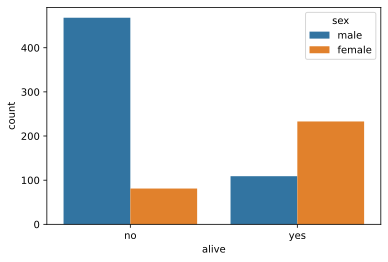

In [6]:
sns.countplot(x = "alive", hue = "sex", data = titanic)

<AxesSubplot:xlabel='class', ylabel='fare'>

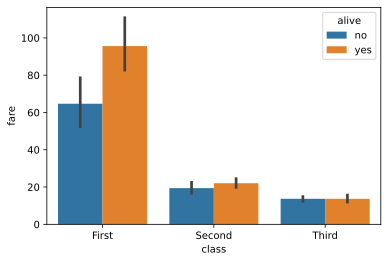

In [7]:
sns.barplot(x = "class", y = "fare",  hue = "alive", data = titanic)

<AxesSubplot:xlabel='alive', ylabel='count'>

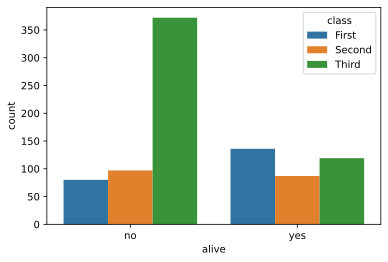

In [8]:
sns.countplot(x = "alive", hue = "class", data = titanic)

<AxesSubplot:xlabel='alive', ylabel='count'>

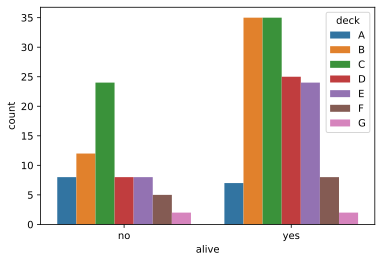

In [9]:
sns.countplot(x = "alive", hue = "deck", data = titanic)

<AxesSubplot:xlabel='age', ylabel='Count'>

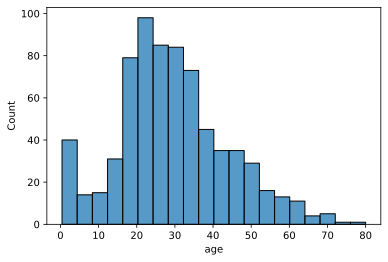

In [10]:
sns.histplot(x = "age", data = titanic)

<AxesSubplot:xlabel='embarked', ylabel='fare'>

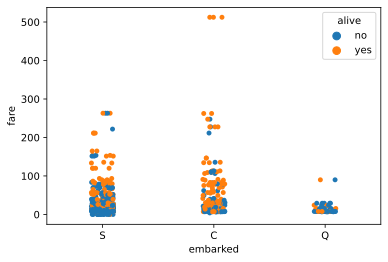

In [11]:
sns.stripplot(x = "embarked", y = "fare",  hue = "alive", data = titanic)

<AxesSubplot:xlabel='embarked', ylabel='fare'>

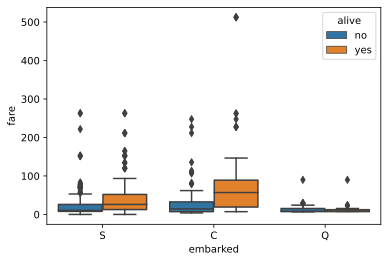

In [12]:
sns.boxplot(x = "embarked", y = "fare",  hue = "alive", data = titanic)

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [14]:
titanic = titanic.drop("deck", axis = 1)

In [15]:
titanic["age"] = titanic["age"].fillna(titanic["age"].mean())

In [16]:
titanic = titanic.dropna()

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [18]:
X = titanic[["age","fare"]]
y = titanic[["survived"]]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

[Text(334.8, 489.24, 'fare <= 50.74\n0.47\n711\n[443, 268]\nDied'),
 Text(141.64615384615385, 380.52000000000004, 'fare <= 10.481\n0.426\n584\n[404, 180]\nDied'),
 Text(51.50769230769231, 271.8, 'age <= 16.5\n0.311\n275\n[222, 53]\nDied'),
 Text(25.753846153846155, 163.08000000000004, '0.486\n12\n[5, 7]\nSurvived'),
 Text(77.26153846153846, 163.08000000000004, 'fare <= 7.133\n0.289\n263\n[217, 46]\nDied'),
 Text(51.50769230769231, 54.360000000000014, '0.054\n36\n[35, 1]\nDied'),
 Text(103.01538461538462, 54.360000000000014, '0.318\n227\n[182, 45]\nDied'),
 Text(231.7846153846154, 271.8, 'age <= 5.5\n0.484\n309\n[182, 127]\nDied'),
 Text(180.27692307692308, 163.08000000000004, 'fare <= 27.825\n0.397\n33\n[9, 24]\nSurvived'),
 Text(154.52307692307693, 54.360000000000014, '0.18\n20\n[2, 18]\nSurvived'),
 Text(206.03076923076924, 54.360000000000014, '0.497\n13\n[7, 6]\nDied'),
 Text(283.2923076923077, 163.08000000000004, 'age <= 55.5\n0.468\n276\n[173, 103]\nDied'),
 Text(257.5384615384615

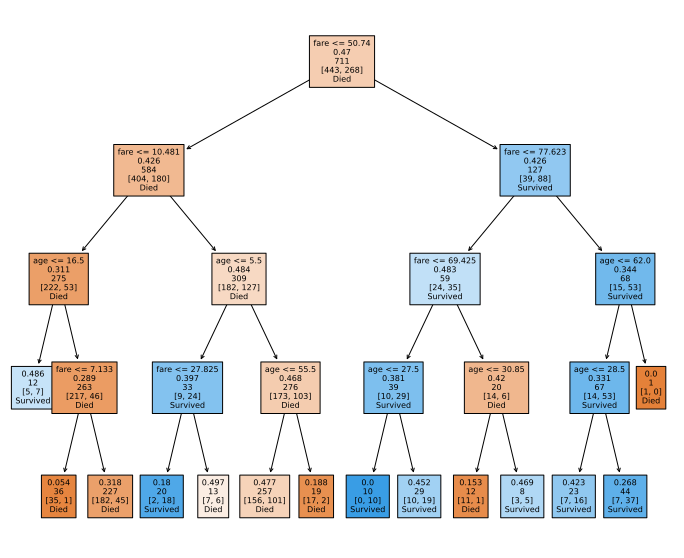

In [20]:
clf = DecisionTreeClassifier(min_samples_split = 20, max_depth = 4, random_state = 234)
model = clf.fit(X_train, y_train)
plt.figure(figsize=(12,10))
plot_tree(model, 
               feature_names = X.columns, label = None, 
               impurity = True,  class_names= ["Died", "Survived"], 
               filled = True, fontsize = 8)

In [21]:
y_pred = model.predict(X_test)

In [22]:
metrics.accuracy_score(y_test, y_pred)

0.6460674157303371

In [23]:
lgmodel = LogisticRegression(random_state = 234)

In [24]:
lgmodel.fit(X_train, np.ravel(y_train))

LogisticRegression(random_state=234)

In [25]:
lgpredict = lgmodel.predict(X_test)

In [26]:
metrics.accuracy_score(y_test, lgpredict)

0.6235955056179775

In [27]:
rfmodel = RandomForestClassifier(random_state = 234)

In [28]:
rfmodel.fit(X_train, np.ravel(y_train))

RandomForestClassifier(random_state=234)

In [29]:
rfpredict = rfmodel.predict(X_test)

In [30]:
metrics.accuracy_score(y_test, rfpredict)

0.6292134831460674

In [31]:
conf = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted')

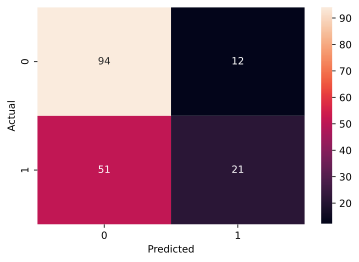

In [32]:
sns.heatmap(conf, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')